# Load the Iris dataset.

- Load Iris and train/test split

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

In [6]:
iris =  load_iris()
df = pd.DataFrame(iris.data, columns =iris.feature_names)
df['target']= iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


- Train KNN for multiple k values and record accuracies

we using your existing DataFrame `df` built from load_iris()

# Train K-NN with different values of k (try 1, 3, 5, 7).

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

So, frist step thst we will do in this point is build X, y from your DataFrame (1), then train/test split (stratify keeps class proportions) (2), after that train KNN for k = 1, 3, 5, 7 and print accuracies...

In [10]:
# 1) 
X = df[iris.feature_names].values   
y = df["target"].values             

# 2) 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 3) 
k_values = [1, 3, 5, 7]
knn_accuracies = []

for k in k_values:
    
    knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"[KNN] k={k:>2} | Accuracy={acc:.3f}")


[KNN] k= 1 | Accuracy=0.933
[KNN] k= 3 | Accuracy=0.911
[KNN] k= 5 | Accuracy=0.911
[KNN] k= 7 | Accuracy=0.933


# Plot accuracy vs. k to see how it changes.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

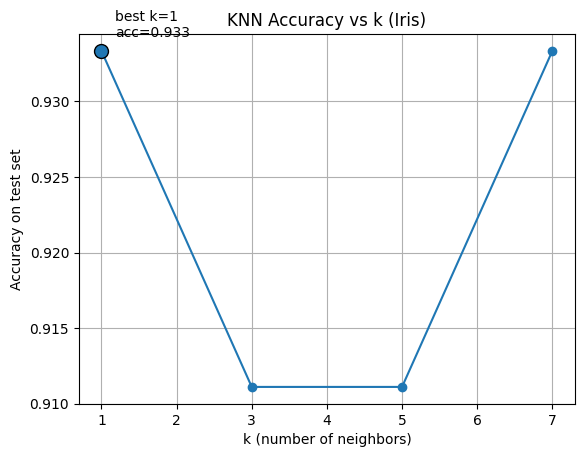

In [12]:
plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.title("KNN Accuracy vs k (Iris)")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy on test set")
plt.grid(True)


best_idx = int(np.argmax(knn_accuracies))
best_k = k_values[best_idx]
best_acc = knn_accuracies[best_idx]
plt.scatter([best_k], [best_acc], s=100, edgecolors='k', zorder=3)
plt.annotate(f"best k={best_k}\nacc={best_acc:.3f}",
             (best_k, best_acc),
             textcoords="offset points", xytext=(10,10))

plt.show()


# Compare performance with logistic regression

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [16]:
lr_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=500, solver="lbfgs", multi_class="auto")
)
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print(f"[Logistic Regression] Accuracy = {acc_lr:.3f}\n")
print("[Logistic Regression] Classification Report")
print(classification_report(y_test, y_pred_lr, target_names=iris.target_names))


best_idx = int(np.argmax(knn_accuracies))   # uses knn_accuracies from step (c)
best_k = k_values[best_idx]
best_knn_acc = knn_accuracies[best_idx]

print(f"\nBest KNN: k={best_k} | Accuracy={best_knn_acc:.3f}")
if best_knn_acc > acc_lr:
    print("=> KNN performed better on this split.")
elif best_knn_acc < acc_lr:
    print("=> Logistic Regression performed better on this split.")
else:
    print("=> Both performed equally on this split.")


[Logistic Regression] Accuracy = 0.911

[Logistic Regression] Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Best KNN: k=1 | Accuracy=0.933
=> KNN performed better on this split.


C:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
